In [1]:
###############################        PROJECT CLASIFICATION 1        #########################


import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB 

In [2]:
warnings.simplefilter(action='ignore')

In [3]:
#CCAvgابتدا پردازش داده را انجام دادم و پس از تعیین مدل متوجه شدم که  مدل با علامت کسری فیچر 
#قابل پیاده سازی نیست
#CCAvgباید داده فیچر 
#notepad++توسط
#تصحیح شود و علامت / به . (نقطه) تغییر یابد تا در پایتون قابل قبول باشد

In [4]:
Data = pd.read_csv('Bank_Personal_Loan_Modelling(1).csv')
Data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
Data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
#checking missing values
Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#preprocessing

In [10]:
#حذف ستون ID)(با توجه به ایندکس ها نیازی به این فیچر نداریم)
Data.drop(labels='ID',axis=1,inplace=True)
Data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [11]:
#ابتدا بررسی فیچر های categorical 

In [12]:
#بررسی فیچر ZIP Code
print('max:',np.max(Data['ZIP Code']))
print('min:',np.min(Data['ZIP Code']))

max: 96651
min: 9307


Text(0.5, 0, 'ZIP Code')

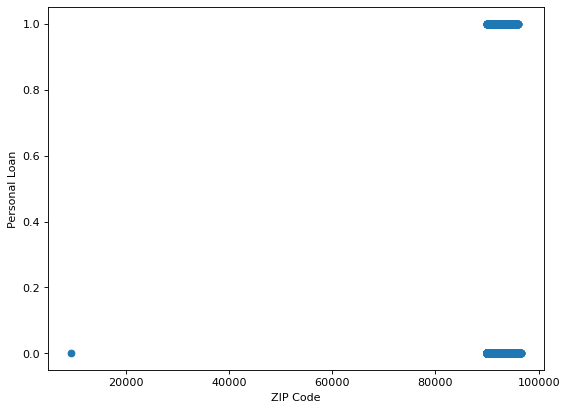

In [13]:
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Data['ZIP Code'],Data['Personal Loan'])
plt.ylabel("Personal Loan")
plt.xlabel("ZIP Code")

In [14]:
### حذف داده های زیر 80000 زیرا نسبت به بقیه دیتا حالت نویز دارد(احتمالا اشتباه تایپی بوده)
Data = Data[Data["ZIP Code"]>80000]
Data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Text(0.5, 0, 'ZIP Code')

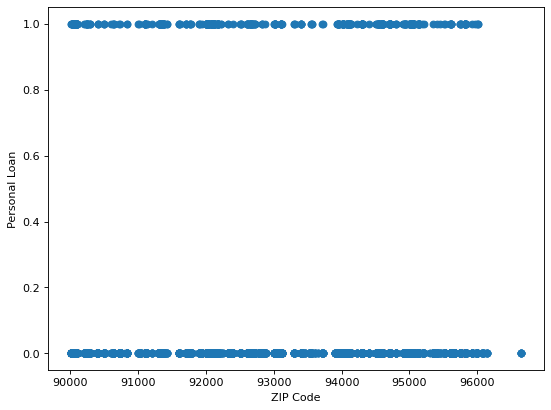

In [15]:
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Data['ZIP Code'],Data['Personal Loan'])
plt.ylabel("Personal Loan")
plt.xlabel("ZIP Code")

<function matplotlib.pyplot.show(close=None, block=None)>

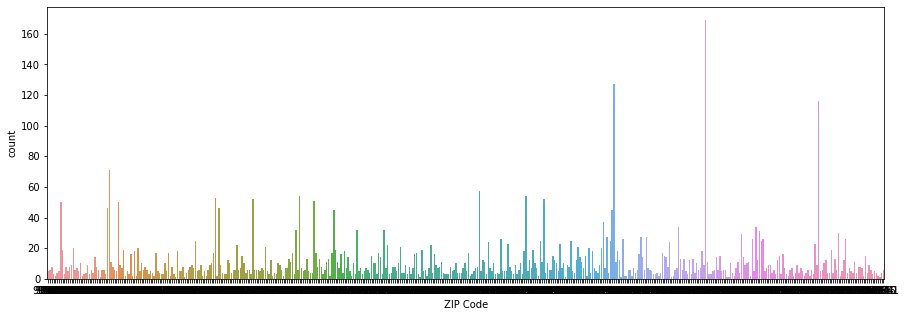

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='ZIP Code',data=Data)
plt.show


In [17]:
#از نظر من احتمالا رقم چهارم و پنجم کد پستی نشانگر منطقه(یا ایالت) باشد، پس بهتر است داده های این فیچر را بر اساس
# منطقه (رقم چهارم و پنجم) دسته بندی کنیم تا ببینیم بیشتر به کدام منطقه وام تعلق گرفته است

In [18]:
Data['zone']=(Data['ZIP Code']//1000) #تغییر فیچر به فیچر جدیدی که فقط رقم چهارم و پنجم فیچر قبلی را داشته باشد
Data.drop(labels='ZIP Code',axis=1,inplace=True)
Data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zone
0,25,1,49,4,1.6,1,0,0,1,0,0,0,91
1,45,19,34,3,1.5,1,0,0,1,0,0,0,90
2,39,15,11,1,1.0,1,0,0,0,0,0,0,94
3,35,9,100,1,2.7,2,0,0,0,0,0,0,94
4,35,8,45,4,1.0,2,0,0,0,0,0,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,92
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,92
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,93
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,90


<function matplotlib.pyplot.show(close=None, block=None)>

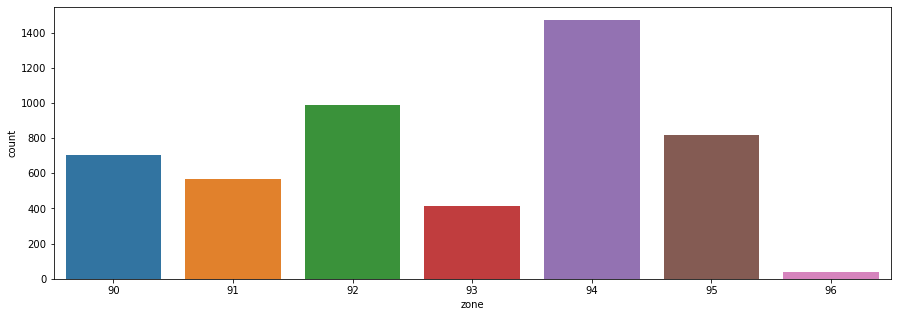

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='zone',data=Data)
plt.show


In [20]:
print('max:',np.max(Data['zone']))
print('min:',np.min(Data['zone']))

max: 96
min: 90


In [21]:
Data['zone']=2+(Data['zone']-90)
#هنگام دسته بندی بهتر است اعداد 0 و یک را در نظر نگیریم به همین خاطر دسته بندی مناطق را از 2 شروع کردم
#درواقع به فرم داده کتگوری به این فیچر نگاه میکنیم(categorical)
Data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zone
0,25,1,49,4,1.6,1,0,0,1,0,0,0,3
1,45,19,34,3,1.5,1,0,0,1,0,0,0,2
2,39,15,11,1,1.0,1,0,0,0,0,0,0,6
3,35,9,100,1,2.7,2,0,0,0,0,0,0,6
4,35,8,45,4,1.0,2,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,4
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,4
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,5
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,2


In [22]:
print(pd.unique(Data['zone']))

[3 2 6 4 5 7 8]


In [23]:
#بررسی فیچر Education

<function matplotlib.pyplot.show(close=None, block=None)>

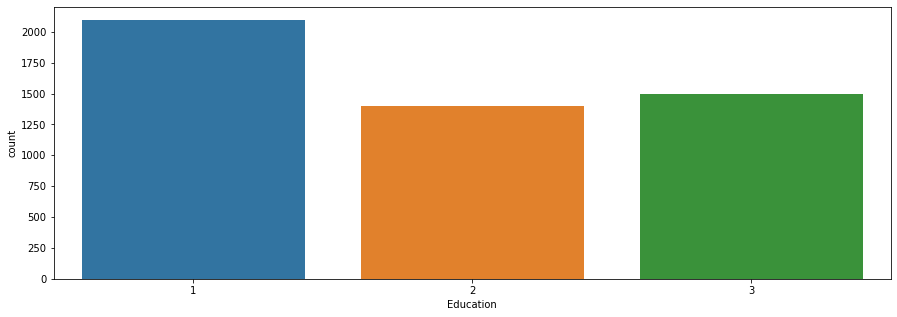

In [24]:
#این فیچر فرمت کتگوری دارد
plt.figure(figsize=(15,5))
sns.countplot(x='Education',data=Data)
plt.show


In [25]:
print('max:',np.max(Data['Education']))
print('min:',np.min(Data['Education']))
print(pd.unique(Data['Education']))

max: 3
min: 1
[1 2 3]


In [26]:
# این فیچر نیز فرمت کتگوری دارد پس بهتر است شماره دسته بندی ها از 2 شروع شود و 0 و 1 در آنها نباشد
Data['Education']=1+(Data['Education'])
Data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zone
0,25,1,49,4,1.6,2,0,0,1,0,0,0,3
1,45,19,34,3,1.5,2,0,0,1,0,0,0,2
2,39,15,11,1,1.0,2,0,0,0,0,0,0,6
3,35,9,100,1,2.7,3,0,0,0,0,0,0,6
4,35,8,45,4,1.0,3,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,4,0,0,0,0,1,0,4
4996,30,4,15,4,0.4,2,85,0,0,0,1,0,4
4997,63,39,24,2,0.3,4,0,0,0,0,0,0,5
4998,65,40,49,3,0.5,3,0,0,0,0,1,0,2


In [27]:
print(pd.unique(Data['Education']))

[2 3 4]


<function matplotlib.pyplot.show(close=None, block=None)>

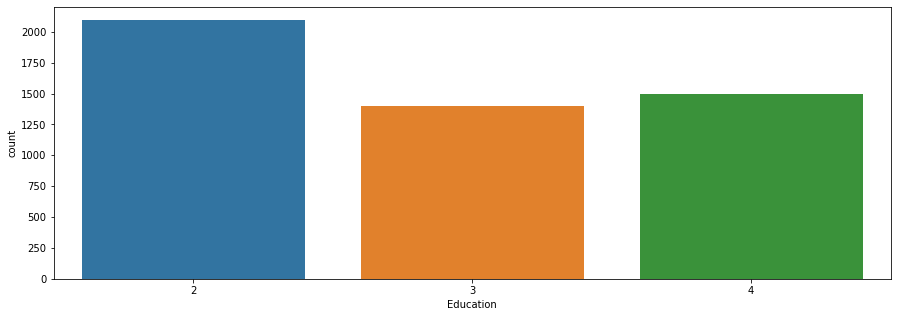

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='Education',data=Data)
plt.show


Text(0.5, 0, 'CCAvg')

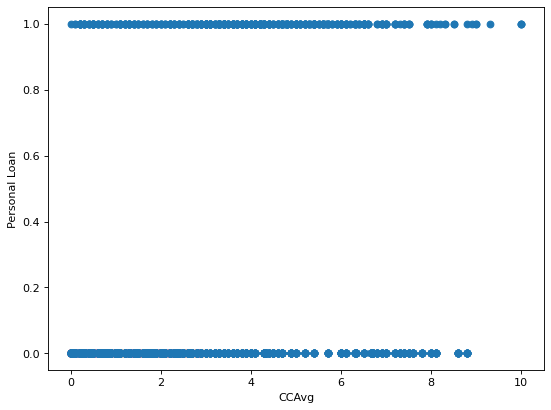

In [29]:
#بررسی فیچر CCAvg
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Data['CCAvg'],Data['Personal Loan'])
plt.ylabel("Personal Loan")
plt.xlabel("CCAvg")

In [30]:
#نویزی مشاهده نمیشود

<function matplotlib.pyplot.show(close=None, block=None)>

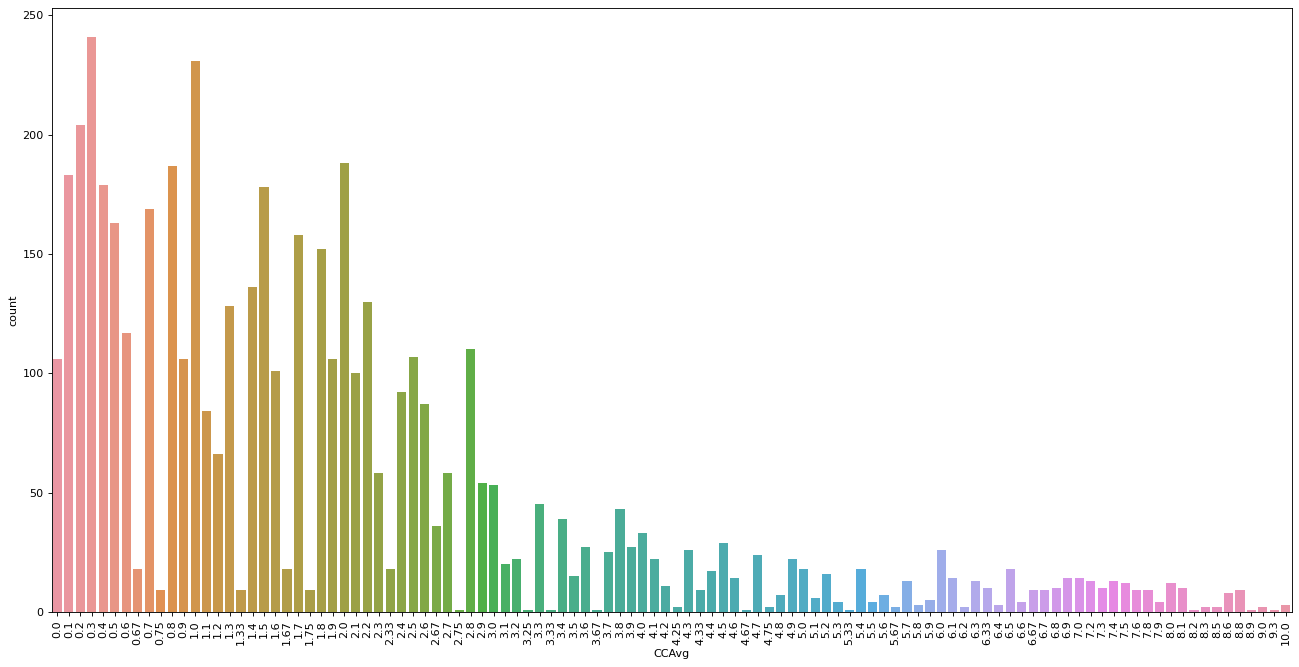

In [31]:
plt.figure(figsize=(20,10),dpi=80)
sns.countplot(x='CCAvg',data=Data)
plt.xticks(rotation=90)
plt.show

In [32]:
#بررسی فیچر Family
print(pd.unique(Data['Family']))

[4 3 1 2]


<function matplotlib.pyplot.show(close=None, block=None)>

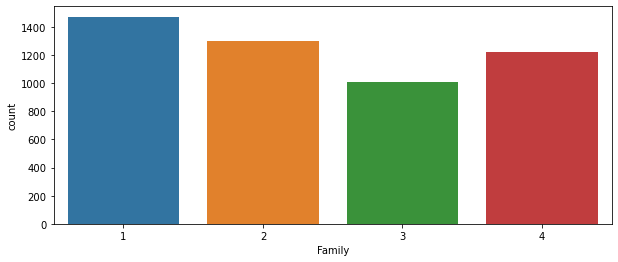

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='Family',data=Data)
plt.show

In [34]:
#Securities Accountبررسی فیچر
print(pd.unique(Data['Securities Account']))

[1 0]


<function matplotlib.pyplot.show(close=None, block=None)>

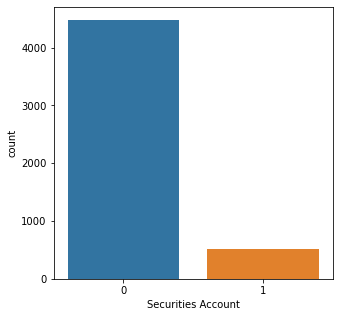

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='Securities Account',data=Data)
plt.show

In [36]:
#CD Accountبررسی فیچر
print(pd.unique(Data['CD Account']))

[0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

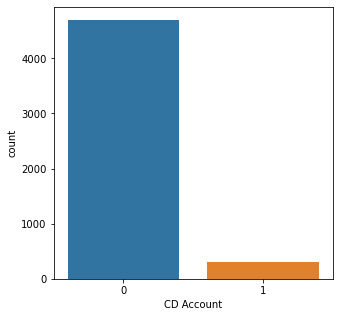

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='CD Account',data=Data)
plt.show

In [38]:
#Onlineبررسی فیچر
print(pd.unique(Data['Online']))

[0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

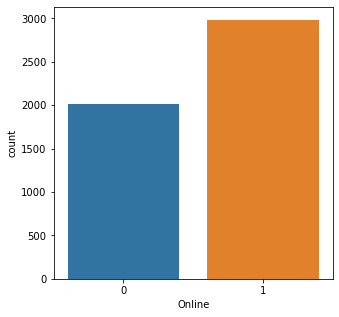

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x='Online',data=Data)
plt.show

In [40]:
#CreditCardبررسی فیچر
print(pd.unique(Data['CreditCard']))

[0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

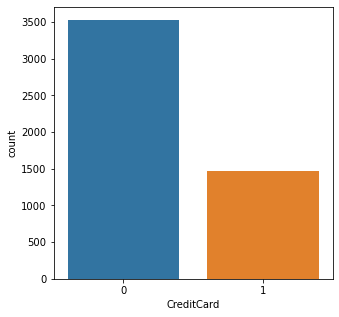

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(x='CreditCard',data=Data)
plt.show

In [42]:
#بررسی فیچرهای  numerical

Text(0.5, 0, 'Mortgage')

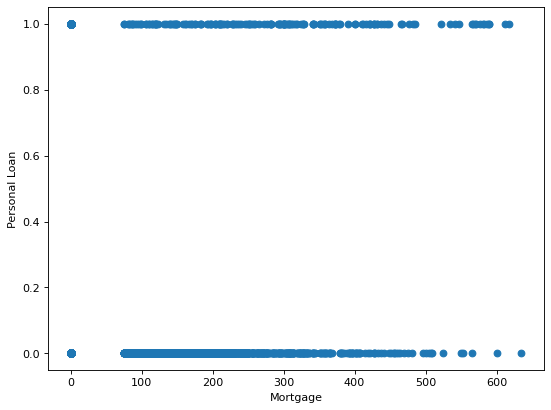

In [43]:
#بررسی فیچر Mortgage
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Data['Mortgage'],Data['Personal Loan'])
plt.ylabel("Personal Loan")
plt.xlabel("Mortgage")

<function matplotlib.pyplot.show(close=None, block=None)>

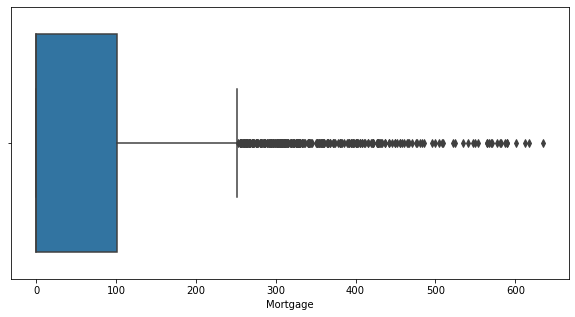

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Mortgage',data=Data)
plt.show

In [45]:
print('max:',np.max(Data['Mortgage']))
print('min:',np.min(Data['Mortgage']))

max: 635
min: 0


In [46]:
#نویزی مشاهده نمیشود

Text(0.5, 0, 'Income')

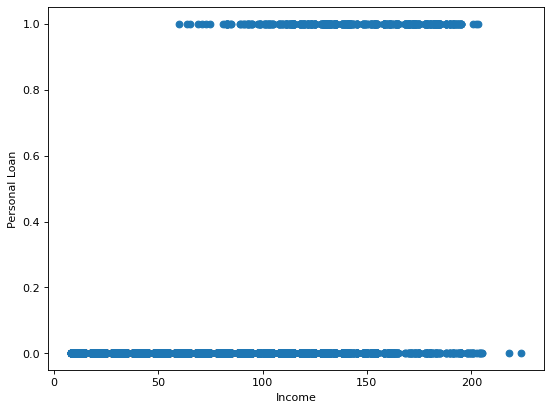

In [47]:
#بررسی فیچر Income
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Data['Income'],Data['Personal Loan'])
plt.ylabel("Personal Loan")
plt.xlabel("Income")

<function matplotlib.pyplot.show(close=None, block=None)>

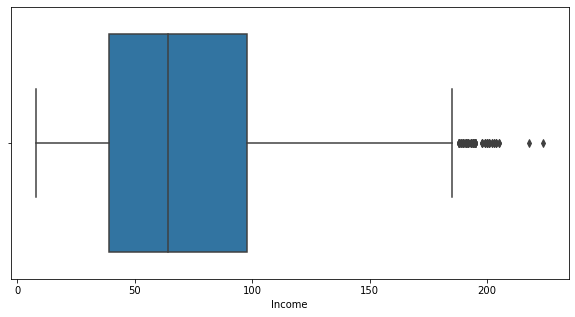

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Income',data=Data)
plt.show

In [49]:
#داده های پرت برای درامدهای خیلی بالاست پس نمیتواند نویز باشد

In [50]:
print('max:',np.max(Data['Income']))
print('min:',np.min(Data['Income']))

max: 224
min: 8


Text(0.5, 0, 'Experience')

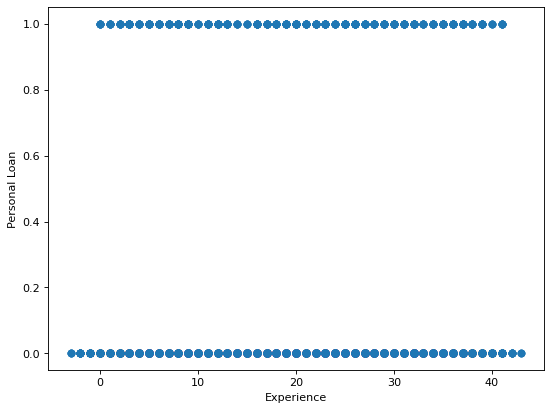

In [51]:
#بررسی فیچچر Experience
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Data['Experience'],Data['Personal Loan'])
plt.ylabel("Personal Loan")
plt.xlabel("Experience")

<function matplotlib.pyplot.show(close=None, block=None)>

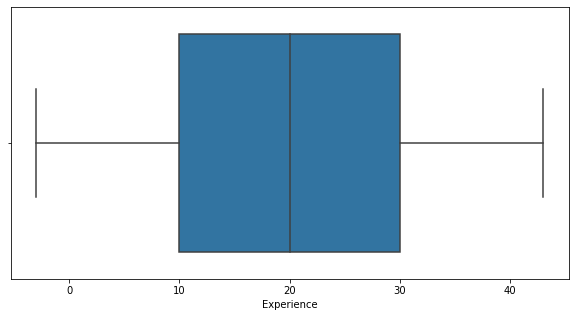

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Experience',data=Data)
plt.show

In [53]:
print('max:',np.max(Data['Experience']))
print('min:',np.min(Data['Experience']))

max: 43
min: -3


In [54]:
#میزان تجربه کاری یک فرد نمیتواند منفی باشد پس داده های منفی نویز بوده و باید حذف شوند

In [55]:
### حذف داده های زیر0 زیرا نسبت به بقیه دیتا حالت نویز دارد (احتمالا اشتباه تایپی بوده)
Data = Data[Data["Experience"]>0]
Data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zone
0,25,1,49,4,1.6,2,0,0,1,0,0,0,3
1,45,19,34,3,1.5,2,0,0,1,0,0,0,2
2,39,15,11,1,1.0,2,0,0,0,0,0,0,6
3,35,9,100,1,2.7,3,0,0,0,0,0,0,6
4,35,8,45,4,1.0,3,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,4,0,0,0,0,1,0,4
4996,30,4,15,4,0.4,2,85,0,0,0,1,0,4
4997,63,39,24,2,0.3,4,0,0,0,0,0,0,5
4998,65,40,49,3,0.5,3,0,0,0,0,1,0,2


In [56]:
#بررسی فیچچر Age
print('max:',np.max(Data['Age']))
print('min:',np.min(Data['Age']))

max: 67
min: 25


Text(0.5, 0, 'Age')

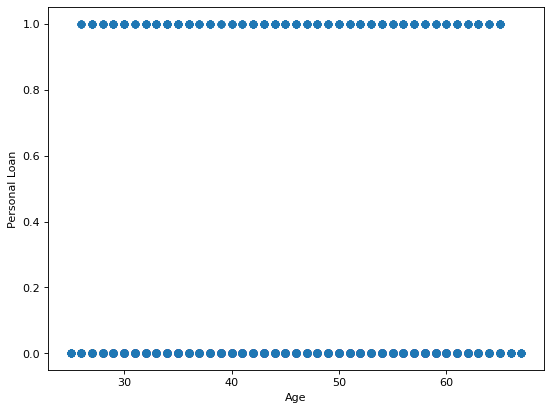

In [57]:
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Data['Age'],Data['Personal Loan'])
plt.ylabel("Personal Loan")
plt.xlabel("Age")

<function matplotlib.pyplot.show(close=None, block=None)>

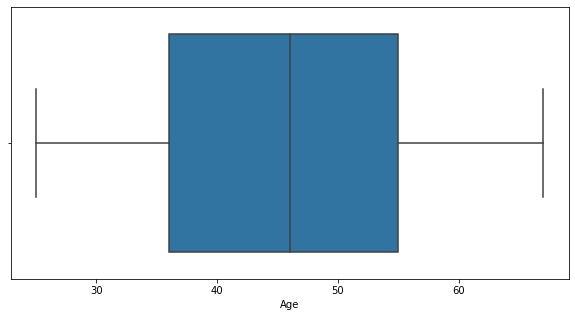

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',data=Data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

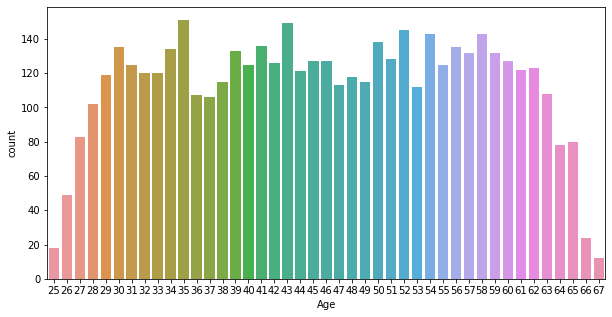

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=Data)
plt.show

In [60]:
###################################     creating model       #############################
Data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zone
0,25,1,49,4,1.6,2,0,0,1,0,0,0,3
1,45,19,34,3,1.5,2,0,0,1,0,0,0,2
2,39,15,11,1,1.0,2,0,0,0,0,0,0,6
3,35,9,100,1,2.7,3,0,0,0,0,0,0,6
4,35,8,45,4,1.0,3,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,4,0,0,0,0,1,0,4
4996,30,4,15,4,0.4,2,85,0,0,0,1,0,4
4997,63,39,24,2,0.3,4,0,0,0,0,0,0,5
4998,65,40,49,3,0.5,3,0,0,0,0,1,0,2


In [61]:
#seperating target variable and features
x = Data.drop("Personal Loan", axis=1)
y = Data["Personal Loan"] #target variable

In [62]:
#################################### 1st model-logestic regresion

In [63]:
#test_size=0.3

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) 
logreg =LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9447098976109215


In [66]:
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2 Score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.0552901023890785
Mean Squared Error:  0.0552901023890785
Root Mean Squared Error: 0.23513847492292386
R2 Score: 0.4019323233239589


In [67]:
#test_size=0.2

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) 
logreg =LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9416581371545547


In [70]:
#test_size=0.4

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0) 
logreg =LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.942652329749104


In [73]:
#test_size=0.35

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=0) 
logreg =LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9432416617905208


In [76]:
#با مقایسه انجام شده بهترین درصد برای داده تست 0.35 است

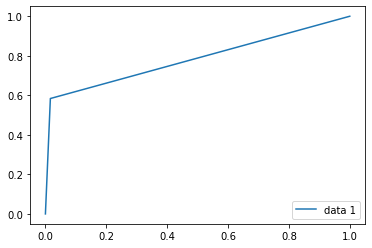

In [77]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

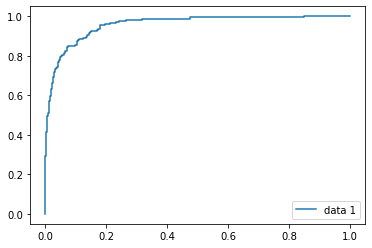

In [78]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

In [79]:
#improve model

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
logreg.classes_

array([0, 1], dtype=int64)

In [81]:
logreg.intercept_

array([-2.46474557])

In [82]:
logreg.coef_

array([[-4.54441106e-01,  4.56591541e-01,  4.97478688e-02,
         6.64098792e-01,  1.10484223e-01,  1.57105657e+00,
         7.88999974e-04, -6.16981047e-01,  3.06332623e+00,
        -5.59060249e-01, -8.44016982e-01, -2.67112007e-02]])

In [83]:
logreg.predict_proba(x)

array([[9.96506556e-01, 3.49344389e-03],
       [9.99636074e-01, 3.63925969e-04],
       [9.99880899e-01, 1.19100942e-04],
       ...,
       [9.89864291e-01, 1.01357087e-02],
       [9.94256261e-01, 5.74373851e-03],
       [9.96013243e-01, 3.98675717e-03]])

In [84]:
logreg.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
logreg.score(x,y)

0.9481663593525916

In [86]:
confusion_matrix(y,logreg.predict(x))

array([[4345,   63],
       [ 190,  283]], dtype=int64)

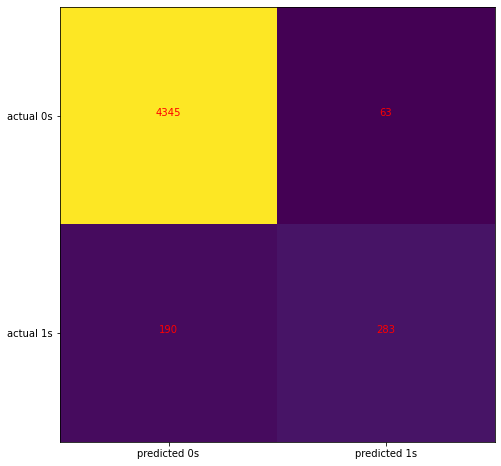

In [87]:
cm=confusion_matrix(y,logreg.predict(x))

fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('actual 0s', 'actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', color='red')
plt.show()        

In [88]:
print(classification_report(y,logreg.predict(x)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4408
           1       0.82      0.60      0.69       473

    accuracy                           0.95      4881
   macro avg       0.89      0.79      0.83      4881
weighted avg       0.94      0.95      0.94      4881



In [89]:
logreg2 =LogisticRegression(solver='liblinear', C=1.0 , random_state=0)
logreg2.fit(x,y) 

LogisticRegression(random_state=0, solver='liblinear')

In [90]:
df= pd.DataFrame({"Age":[42],
                   "Experience":[16],
                   "Income":[30],
                   "Family":[3],
                   "CCAvg":[1.2],
                   "Education":[4],
                   "Mortgage":[0],
                   "Securities Account":[1],
                   "CD Account":[0],
                   "Online":[1],
                   "CreditCard":[1],
                   "zone":[4],
                   "Personal Loan":[0]})


In [91]:
Data2= Data.append(df)
Data2

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zone
0,25,1,49,4,1.6,2,0,0,1,0,0,0,3
1,45,19,34,3,1.5,2,0,0,1,0,0,0,2
2,39,15,11,1,1.0,2,0,0,0,0,0,0,6
3,35,9,100,1,2.7,3,0,0,0,0,0,0,6
4,35,8,45,4,1.0,3,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,30,4,15,4,0.4,2,85,0,0,0,1,0,4
4997,63,39,24,2,0.3,4,0,0,0,0,0,0,5
4998,65,40,49,3,0.5,3,0,0,0,0,1,0,2
4999,28,4,83,3,0.8,2,0,0,0,0,1,1,4


In [92]:
x_train= Data2.drop("Personal Loan", axis=1)[:5000]
y_train= Data2[["Personal Loan"]][:5000].values.reshape(-1,1)

In [93]:
x_test =Data2.drop("Personal Loan", axis=1)[768:]

In [94]:
logreg3 =LogisticRegression(solver='liblinear', C=10 , random_state=0)
logreg3.fit(x_train, y_train.ravel())
y_pred= logreg3.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
################# 2nd model-knn 

In [96]:
K=5
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=0) 
clf =KNeighborsClassifier(K)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [97]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9028671737858397


In [98]:
K=3
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=0) 
clf =KNeighborsClassifier(K)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [99]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9122293739028672


In [100]:
K=7
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=0) 
clf =KNeighborsClassifier(K)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.895845523698069


In [102]:
#2nd way #Creat A Loop To Avoid These Process
K=20
Acc=np.zeros((K))

for i in range(1,K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test,y_pred)
    
Acc    

array([0.906378  , 0.90871855, 0.91222937, 0.90696314, 0.90286717,
       0.89994149, 0.89584552, 0.90228204, 0.89526039, 0.89818607,
       0.90111176, 0.90520772, 0.9016969 , 0.90052662, 0.89877121,
       0.89818607, 0.89877121, 0.90052662, 0.89994149, 0.90345231])

In [103]:
print(np.max(Acc))
print(np.min(Acc))

0.9122293739028672
0.8952603861907549


In [104]:
#بهترین نتیجه برای K=3

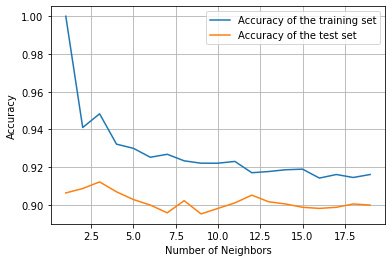

In [105]:
# روش دیگر برای رسیدن به نتیجه 
training_acc = []
test_acc = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test, y_test))

plt.plot(neighbors_setting,training_acc, label='Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()

In [106]:
#شکل به دست آمده 
#Kانتخابی را تایید میکند

In [107]:
#Improve Model

In [108]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range (1, 50)}
grid_kn = GridSearchCV(estimator = knn, # Model
                       param_grid = parameters, # Range of k
                       scoring = 'accuracy', # Strategy to evaluate the performance
                       #of the cross-validated model on the test set.
                       cv = 5,  #cross-validation generator
                       verbose = 1, #Time to calculate
                       n_jobs = -1) # Help to CPU

grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [109]:
grid_kn.best_params_

{'n_neighbors': 8}

In [110]:
#GRIDSEACH روش
#باCV=5
#بهترین همسایگی را برای 
#K=8 میداند

In [111]:
K=8
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=0) 
clf =KNeighborsClassifier(K)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9022820362785254


In [113]:
P =  clf.predict([[42,16,30,3,1.2,4,0,1,0,1,1,4]])
P

array([0], dtype=int64)

In [114]:
################################### 3rd model-naive bayes

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=0) 
clf1 = ComplementNB()
clf1.fit(x_train,y_train.ravel())
y_pred = clf1.predict(x_test)

In [116]:
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7478057343475717


In [117]:
from sklearn.metrics import classification_report, confusion_matrix
clf1.classes_

array([0, 1], dtype=int64)

In [118]:
clf1.intercept_

array([-2.35833511])

In [119]:
clf1.coef_

array([[1.46023771, 2.25642969, 1.09040329, 4.43297495, 4.74210047,
        4.24727539, 1.3368597 , 7.47853527, 8.55862851, 5.81335913,
        6.5082757 , 3.72110957]])

In [120]:
confusion_matrix(y,clf1.predict(x))

array([[3304, 1104],
       [ 120,  353]], dtype=int64)

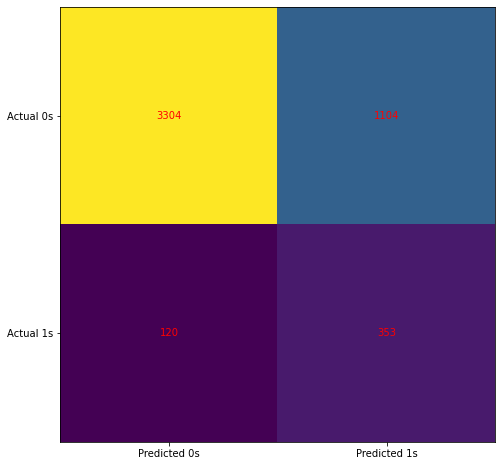

In [121]:
cm = confusion_matrix(y, clf1.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [122]:
print(classification_report(y, clf1.predict(x))) 

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      4408
           1       0.24      0.75      0.37       473

    accuracy                           0.75      4881
   macro avg       0.60      0.75      0.60      4881
weighted avg       0.89      0.75      0.80      4881



In [123]:
P1 =  clf1.predict([[42,16,30,3,1.2,4,0,1,0,1,1,4]])
P1

array([0], dtype=int64)

In [124]:
#improve model

In [125]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
k_fold = KFold(5)
print (cross_val_score(clf, x, y.ravel(), cv=k_fold, n_jobs=1))

[0.91299898 0.90778689 0.90061475 0.9170082  0.91086066]


In [126]:
df3 = Data[Data.index<1952]
df4 = Data[Data.index>2929]
df5 = df3.append(df4)
df5.reset_index (drop=True,inplace=True)
df5

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zone
0,25,1,49,4,1.6,2,0,0,1,0,0,0,3
1,45,19,34,3,1.5,2,0,0,1,0,0,0,2
2,39,15,11,1,1.0,2,0,0,0,0,0,0,6
3,35,9,100,1,2.7,3,0,0,0,0,0,0,6
4,35,8,45,4,1.0,3,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,29,3,40,1,1.9,4,0,0,0,0,1,0,4
3916,30,4,15,4,0.4,2,85,0,0,0,1,0,4
3917,63,39,24,2,0.3,4,0,0,0,0,0,0,5
3918,65,40,49,3,0.5,3,0,0,0,0,1,0,2


In [127]:
#new x and y
X = df5.drop("Personal Loan", axis=1)
Y = df5["Personal Loan"] #target variable

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=0)
clf2 = ComplementNB()
clf2.fit(X_train,Y_train.ravel())
Y_pred = clf2.predict(X_test)

In [129]:
print ("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7514577259475219


In [130]:
confusion_matrix(Y,clf2.predict(X))

array([[2682,  869],
       [ 130,  239]], dtype=int64)

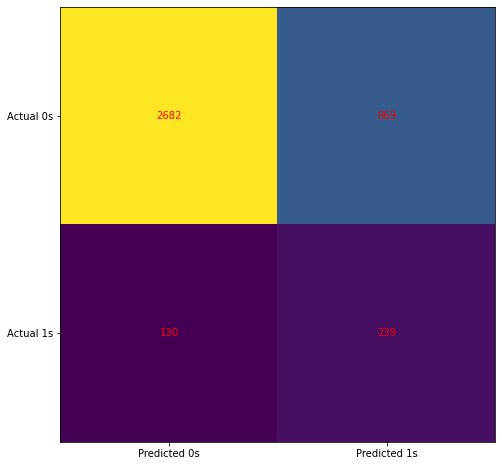

In [131]:
cm = confusion_matrix(Y, clf2.predict(X))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [132]:
P2 =  clf2.predict([[42,16,30,3,1.2,4,0,1,0,1,1,4]])
P2

array([0], dtype=int64)

In [133]:
print(classification_report(Y, clf2.predict(X))) 

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      3551
           1       0.22      0.65      0.32       369

    accuracy                           0.75      3920
   macro avg       0.58      0.70      0.58      3920
weighted avg       0.88      0.75      0.79      3920



In [134]:
#همانطور که انتظار داشتیم مشاهده میشود که در روش مدلسازی نایوبیز به علت زیاد بودن تعداد نمونه ها
##از دقت بسیار پایین تری نسبت به دو مدل سازی قبل برخوردار هستیم

In [135]:
#############################################################################################################3

In [136]:
#طبق بررسی های مدل سازی های انجام شده بالا و بررسی
#accuracy
#های به دست آمده بهترین دقت به دست آمده متعلق به مدل
#LOGESTIC REGRESSION
# میباشد